# 딥러닝
- 신경망(인공신경망, Artificial Neural Network)을 기반으로 학습하는 방법
- XOR 문제를 해결하는 방법으로 등장

## 퍼셉트론 (Perceptron)
- 신경망의 최소 단위: input과 output 존재
- 출력값을 결정하는 활성화 함수(activation function) 존재 - 시그모이드, ReLu, Leaky ReLu 등
- 임계치 t
- b(bias): 가중합에 더해지는 상수로써 최종 출력값에 영향
- 기존 행렬 형태를 벡터로 바꾼 후 가중치 구하고 편향까지 더해서 나온 점수로 데이터 분류 가능

In [ ]:
# 퍼셉트론 실습
import numpy as np

# 입력층
input_data = np.array([[2,3],[5,1]])
print(input_data)

[[2 3]
 [5 1]]


In [ ]:
x = input_data.reshape(-1)
print(x)

[2 3 5 1]


In [ ]:
# 가중치 및 편향
w1 = np.array([2,1,-3,3])
w2 = np.array([1,-1,1,3])
b1 = 3
b2 = 3

In [ ]:
# 가중합
W = np.array([w1, w2])
print(W)
b = np.array([b1, b2])
print(b)
weight_sum = np.dot(W,x) + b v # 행렬곱 계산
print(weight_sum)

[[ 2  1 -3  3]
 [ 1 -1  1  3]]
[3 3]
[-2 10]


In [ ]:
# 출력층
res = 1/(1+np.exp(-weight_sum))
print(res)

[0.11920292 0.9999546 ]


## 인공신경망
- 다층 퍼셉트론(multi-layer perceptron): 기존의 데이터 공간을 변형함으로써 기존의 하나의 퍼셉트론으로는 해결할 수 없었던 문제를 해결할 수 있게 되는 것 => 다수의 뉴런을 사용하는 인공신경망(ANN) = 신경망(Neural Network)
- 입력층(input layer)에 입력된 데이터는 은닉층(hidden layer)이라는 층 거친 후 출력층에 도달
- 입력층의 노드 개수는 피처 개수와 동일. 출력층의 노드 개수는 분류하려는 클래스의 수와 동일
- 출력층의 각 노드가 나타내는 수는 score. 스코어가 높을수록 해당 클래스에 속할 확률 높다는 뜻

- 딥러닝의 학습 과정은 각 층을 연결하는 함수를 결정하는 과정

### 오차 역전파(back propagation)
- 다층 퍼셉트론에서 최적값 찾아가는 과정
- 출력층 - 은닉층 - 입력층 순서대로 반대로 거슬러 올라가는 방향
- 오차를 기반으로 가중치를 수정한 후 더 좋은 성능 낼 수 있도록 모형 개선

<<순서>>
    
    1. 가중치 초기화
    
    2. 순전파(forward propagation)를 통한 출력값 계산
    
    3. 비용 함수(cost function) 정의 및 1차 미분식 구하기
    
    4. 역전파(back propagation)를 통한 1차 미분값 구하기
    
    5. 파라미터(parameter) 업데이트
    
    6. 2-6 과정 반복

### 활성화 함수(activation function)
- 계산 함수(step function): 
- 부호 함수(sign function): 
- 시그모이드 함수(sigmoid function): 0과 1 사이의 값 출력, 학습하는 과정에서 미분 반복하면 그래디언트 값이 매우 작아지는 그래디언트 소실 문제(vanishing gradient problem) 발생 가능 => x값이 지나치게 크거나 작을 경우 미분값이 0에 가까워지고 vanishing gradient problem이 발생해 학습 속도가 느려질 수 있음
- 하이퍼볼릭 탄젠트 함수(hyperbolic tangent, tanh): 시그모이드 변형 (-1부터 1 사이)
- ReLu(Rectified Linear Unit) 함수: 상한선 없음
- Leaky ReLu 함수: 
- 항등 함수(identity function): 선형함수라고도 부름. 입력과 출력이 같은 값을 가짐. 회귀 문제에 사용.
- 소프트맥스 함수(softmax function): 주로 최종 출력층에서 사용. 분류문제에 사용. 오버플로(overflow)문제 발생 가능 (출력값이 컴퓨터가 표현할 수 있는 수의 한계 초과하는 문제) - 그래서 소프트맥스 함수를 변형해서 쓰기도 함

### 배치 정규화 (batch normalization)
- 해당 층 값의 분포 변경 (=평균과 분산 고정)
- 그래디언트 소실 문제 줄임으로써 신경망의 학습 속도 향상할 수 있다는 장점

### 드롭아웃(dropout)
- 신경망의 일부 노드를 사용하지 않는 방법
- 어떤 노드를 신경망에서 일시적으로 제거할지는 각 층에서 무작위로 선택
- 오버피팅을 방지할 수 있다는 장점

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(32,32,1))) # 층 쌓기
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary() # 모형 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 100)       200       
                                                                 
 dense_1 (Dense)             (None, 32, 32, 50)        5050      
                                                                 
 dense_2 (Dense)             (None, 32, 32, 5)         255       
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 위와 동일한 모형 구조를 함수형 API 사용해서 구현
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(32,32,1))
x = Dense(units=100, activation='relu')(input_layer)
x = Dense(units=50, activation='relu')(x)
output_layer = Dense(units=5, activation='softmax')(x)
model2 = Model(input_layer, output_layer)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 dense_3 (Dense)             (None, 32, 32, 100)       200       
                                                                 
 dense_4 (Dense)             (None, 32, 32, 50)        5050      
                                                                 
 dense_5 (Dense)             (None, 32, 32, 5)         255       
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


x = Dense(units=100, activation='relu')(x)는 은닉층과 활성화 함수를 분리해

x = Dense(units=100)(x)

x = Activation('relu')(x)로도 쓸 수 있음

In [ ]:
# 모형 저장 및 불러오기
model.save('cnn_model.h5') # h5 파일은 hdf5 파일 (Hierarchical Data Format version 5) 의미. 대용량 데이터 저장하기 위한 파일 포맷

In [ ]:
from tensorflow.keras.models import load_model
cnn_model2 = load_model('cnn_model.h5')

### 배치 사이즈(batch size), 에포크(epoch), 반복(iteration) 차이

- batch size: 전체 트레이닝 데이터를 여러 개의 미니 배치로 나누었을 때, 하나의 미니 배치에 속하는 데이터의 개수 의미. 학습 시간 줄이고 효율적으로 리소스 활용하기 위해 사용

- epoch: 전체 트레이닝 셋이 신경망을 통과한 횟수

- iteration: 1-epoch를 마치는 데 필요한 미니 배치 수

그리고 신경망의 가중치 파라미터는 미니 배치당 한 번 업데이트하므로 파라미터 업데이트 횟수도 iteration 횟수와 동일

### 분류 신경망 실습

신경망을 이용해 와인 종류 분류하는 모형 만들기

In [ ]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

# 피처/타깃 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 피처, 타깃 데이터 차원 확인
print(X.shape) # 13개 feature
print(y.shape)

(178, 13)
(178,)


In [ ]:
# 타깃 데이터 종류 확인
print(set(y)) # 분류 문제이며 총 3가지 클래스로 구분됨을 알 수 있음

{0, 1, 2}


In [ ]:
# 타깃 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state=0)

In [ ]:
# 신경망 생성
from tensorflow.keras.models import Sequential # 신경망 생성 선언할 때 사용되는 함수
from tensorflow.keras.layers import Dense # 신경망 층 추가할 때 사용
from tensorflow.keras.layers import BatchNormalization #
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1] # 신경망에 사용되는 피처 개수
n_class = len(set(y)) # 클래스 개수 저장 (=3)
epo = 30 # epoch값 설정

model = Sequential() # 초기 모형 생성
model.add(Dense(20, input_dim=n_feat)) # 20은 아웃풋의 차원 의미
model.add(BatchNormalization()) # 배치 정규화 실행
model.add(Activation('relu'))
model.add(Dense(n_class)) # 최종 아웃풋 층 추가. 구분해야 할 클래스 개수만큼 아웃풋 노드 개수로 설정
model.add(Activation('softmax'))

In [ ]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 63        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_______________________________________________________

In [ ]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 이진 분류 문제에서는 binary_crossentropy
# 다중 분류 문제에서는 categorical_crossentropy

In [ ]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 2s 4ms/step - loss: 1.9798 - accuracy: 0.3459
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 1.6155 - accuracy: 0.3835
Epoch 3/30
27/27 [==============================] - 0s 5ms/step - loss: 1.2918 - accuracy: 0.3985
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 1.0279 - accuracy: 0.4436
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 0.9092 - accuracy: 0.5263
Epoch 6/30
27/27 [==============================] - 0s 5ms/step - loss: 0.8728 - accuracy: 0.6015
Epoch 7/30
27/27 [==============================] - 0s 5ms/step - loss: 0.8734 - accuracy: 0.5639
Epoch 8/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7951 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8200 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7862 - accuracy: 0.6165
Epoch 11/30
27/27 [

In [ ]:
# 학습 평가
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

5/5 [==============================] - 0s 5ms/step - loss: 1.6222 - accuracy: 0.5489
0.548872172832489
2/2 [==============================] - 0s 11ms/step - loss: 1.6692 - accuracy: 0.5778
0.5777778029441833


In [ ]:
# 정확도 및 손실 정도 시각화 준비
import numpy as np
epoch = np.arange(1, epo+1)
print(epoch)
accuracy = hist.history['accuracy']
print(accuracy) # 에포크 별 정확도
loss = hist.history['loss']
print(loss) # 에포크 별 손실 정도

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7744361162185669, 0.7518796920776367, 0.7518796920776367, 0.7443609237670898, 0.7894737124443054, 0.7969924807548523, 0.7669172883033752, 0.8421052694320679, 0.8270676732063293, 0.8270676732063293, 0.8421052694320679, 0.8421052694320679, 0.8195488452911377, 0.8345864415168762, 0.8571428656578064]
[1.979773998260498, 1.6155288219451904, 1.2918163537979126, 1.0279443264007568, 0.9091539978981018, 0.8727607727050781, 0.873351514339447, 0.7951136231422424, 0.8200011253356934, 0.7861717939376831, 0.7411380410194397, 0.7207071781158447, 0.7283996343612671, 0.7208625674247742, 0.661677896976471, 0.6384394

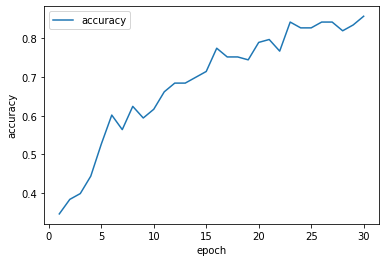

In [ ]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

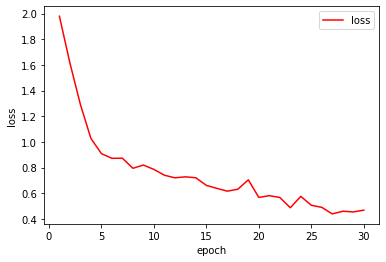

In [ ]:
# 손실 그래프
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 회귀 신경망 학습

보스턴 집값 예측

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_boston = datasets.load_boston()

# 피처, 타깃 데이터 지정
X = raw_boston.data
y = raw_boston.target

# 피처 데이터 차원 확인
print(X.shape)

# 타깃 데이터 종류 확인
print(set(y))

(506, 13)
{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [ ]:
# 신경망 생성
n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))

# 모형 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
76/76 [==============================] - 2s 5ms/step - loss: 474.8179 - mean_squared_error: 474.8179
Epoch 2/30
76/76 [==============================] - 0s 4ms/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 4ms/step - loss: 81.1661 - mean_squared_error: 81.1661
Epoch 4/30
76/76 [==============================] - 0s 4ms/step - loss: 72.6059 - mean_squared_error: 72.6059
Epoch 5/30
76/76 [==============================] - 0s 5ms/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 4ms/step - loss: 57.3056 - mean_squared_error: 57.3056
Epoch 7/30
76/76 [==============================] - 0s 4ms/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 5ms/step - loss: 48.0304 - mean_squared_error: 48.0304
Epoch 9/30
76/76 [==============================] - 0s 5ms/step - loss: 44.4123 - mean_squared_error: 44.4123
Epoch 10

In [ ]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

12/12 [==============================] - 0s 3ms/step - loss: 51.5557 - mean_squared_error: 51.5557
51.555728912353516
4/4 [==============================] - 0s 3ms/step - loss: 73.9725 - mean_squared_error: 73.9725
73.97254943847656


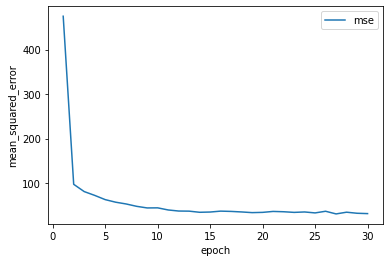

In [ ]:
# 시각화 준비
epoch = np.arange(1, epo+1)
mse = hist.history['mean_squared_error']
loss = hist.history['loss']

# MSE 그래프
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

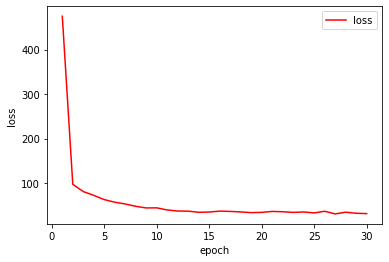

In [ ]:
# 손실 그래프
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

[14.92687   17.681885  26.267525   7.917672  15.005162  20.334696
 11.6320305 22.128702  13.236664   7.889099   5.1158013  9.617928
 10.792666   2.56197   33.26321   22.726969  13.68999   29.55882
 24.675919  21.299343  22.89376   17.086323  16.023739  26.36598
 21.479933  10.68911   17.37977   11.004324  28.347004  15.011785
 10.714345  12.856977  17.735561  20.255518  24.823114  12.987618
  4.140374  16.951511   6.411767   6.4219604 22.591524  18.943974
 12.9456415  9.773451  17.008007  23.849716  16.26449   14.620793
  7.636937  20.454527   7.7502346 11.073199  18.99207   22.40168
  7.765296  15.407387  17.322489  10.06826   14.9718895 18.075176
 16.16295   18.72122   24.999453  24.195618   9.034815  24.184473
 11.682703  13.9690275  8.437708  20.768137  15.780749  17.593168
 26.88238   23.865866  16.954937  -1.263047  27.122023  20.394745
 23.05681   16.387417  22.719767  17.167488  14.822986  28.526913
 28.235546  21.927986  20.246098   4.790781  24.334215   9.029682
  9.7261095  

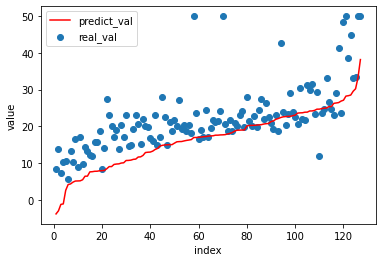

In [ ]:
# 실젯값, 에측값 데이터 프레임 생성
pred_y = model.predict(X_te).flatten() # 예측값 구하고 flatten 메소드 통해 예측값 쭉 펼치기 (데이터프레임 만들기 위해)
print(pred_y) # 예측값 확인
res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real_val'] = y_te # 실젯값을 새로운 열로 추가
res_df.head(3)
df_sort = res_df.sort_values(['predict_val'], ascending=True) # 예측값 기준 오름차순으로 정렬
df_sort.head(3)

# 예측값, 실젯값 그래프
idx = np.arange(1, len(df_sort)+1)
plt.scatter(idx, df_sort['real_val'], marker='o', label='real_val')
plt.plot(idx, df_sort['predict_val'], color='r', label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

## 합성곱 신경망(CNN, Convolution Neural Network)

- 이미지 분류에서 좋은 성능 보여줌
- 가중치 w의 시점은 w(i-k) = 플립(flip): 가중치는 커널(kernel)이라 부름

### 패딩(Padding)

- 입력 데이터에 커널을 합성곱한 후 출력 데이터의 차원이 줄어드는 현상 방지하기 위한 방법
- 입력 데이터 주변을 특정값으로 채우는 것을 의미


### 스트라이드(Stride)

- 한 번 합성곱 연산한 후 다음 계산 영역 선택할 때 얼마나 이동할지 간격 정하는 값

### 풀링(Pooling)
- 데이터 차원 줄이는 방법

In [ ]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# 데이터 불러오기 (손글씨 데이터 셋)
from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data() # mnist 데이터는 불러올 때 트레이닝 데이터와 테스트 데이터 나눠서 불러올 수 있음

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 오리지널 데이터 차원 확인
print(X_tn0.shape) # 트레이닝 피처 데이터: (이미지 개수, 행 열) 형태
print(y_tn0.shape) # 트레이닝 타깃 데이터
print(X_te0.shape) # 테스트 피처 데이터
print(y_te0.shape) # 테스트 타깃 데이터

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


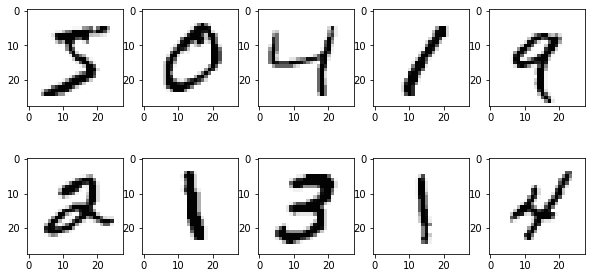

In [ ]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) # 플롯 사이즈 설정
for i in range(2*5): # 10개만 확인
  plt.subplot(2, 5, i+1) # 서브플롯 설정
  plt.imshow(X_tn0[i].reshape((28, 28)),  # i번째 데이터 시각화
               cmap='Greys')
plt.show()

In [ ]:
# 타깃 클래스 확인
set(y_tn0) # 0부터 9까지 숫자를 구분하는 데이터임을 알 수 있음

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# 피처 데이터 스케일 조정

''' 오리지널 데이터의 차원은 (이미지 개수, 행, 열) 형태의 3차원으로 표현. 하지만 CNN에는 4차원 형태로 구성되어야 함. (이미지 개수, 행, 열, 채널)
채널은 흔히 RGB로 구분되는 것을 의미: 그래서 채널 수는 3. mnist 데이터는 채널 1개의 데이터임'''

X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255 # 이미지 픽셀값은 0-255 사이에 분포해 있는 최댓값이 1이 되도록 조정 (딥러닝 성능 좋아짐)
print(X_tn.shape)

X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# 타깃 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [ ]:
# CNN 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_tn0)) # 클래스 개수 설정 (0-9 총 10가지 숫자 구분할 것이기 때문에 10개 클래스: 최종 출력층에서 사용하게 됨)

model = Sequential() # 모형 생성

# 32개의 이미지 데이터(output data) 출력된다는 뜻
# input_shape는 인풋 데이터의 차원을 의미
# valid나 same 중 선택 가능. valid는 padding을 하지 않겠다는 뜻. same은 패딩을 함으로써 입력 데이터의 크기와 동일하게 조정
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='valid', activation='relu'))
# 맥스풀링
model.add(MaxPool2D(pool_size=(2,2)))
# 드롭아웃 - 사용하지 않을 노드의 비율
model.add(Dropout(0.25))
# 합성층 추가
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
# 맥스풀링
model.add(MaxPool2D(pool_size=(2,2)))
# 드롭아웃
model.add(Dropout(0.25))
# 최종 아웃풋 형태 고려해 행렬 형태로 이루어진 데이터 벡터 형태로 펼쳐줌
model.add(Flatten())
# 신경망 층 추가
model.add(Dense(1024, activation='relu'))
# 드롭아웃
model.add(Dropout(0.5))
# 활성화 함수 소프트맥스로 설정한 후 최종 출력층 구성
model.add(Dense(n_class, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)         

In [ ]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 82s 136ms/step - loss: 0.2284 - accuracy: 0.9290
Epoch 2/3
600/600 [==============================] - 73s 121ms/step - loss: 0.0751 - accuracy: 0.9758
Epoch 3/3
600/600 [==============================] - 57s 95ms/step - loss: 0.0571 - accuracy: 0.9824


In [ ]:
# 모형 평가
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0279 - accuracy: 0.9915
0.9914666414260864
313/313 [==============================] - 4s 11ms/step - loss: 0.0302 - accuracy: 0.9903
0.9902999997138977


In [ ]:
# 오답 데이터 확인
y_pred_hot = model.predict(X_te) # 테스트 피처 데이터를 이용해 예측값 구함
print(y_pred_hot[0]) # 예측값 형태 확인해 보면 원-핫 인코딩 형태인 것 확인 가능


[4.4155484e-09 3.8842342e-07 2.4034609e-06 1.4802612e-05 8.9069205e-09
 3.6369162e-08 3.3611922e-12 9.9997962e-01 1.2044082e-07 2.6789335e-06]


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred_hot, axis=1) # 실젯값과 예측값의 동일 유무 확인하기 위해 numpy 사용해서 예측값을 원-핫 인코딩 형태가 아닌 원본 숫자 형태로 바꿈
print(y_pred) # 숫자 형태로 돌아온 것 확인

[7 2 1 ... 4 5 6]


In [ ]:
diff = y_te0 - y_pred # 실젯값과 예측값 차이 구함 (같다면 0, 다르다면 != 0)
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len): # 몇 번째 테스트 피처 데이터가 다른지 저장하기 위해 테스트 데이터 순서대로 확인해봄
  if(diff[i]!=0):
    diff_idx.append(i)

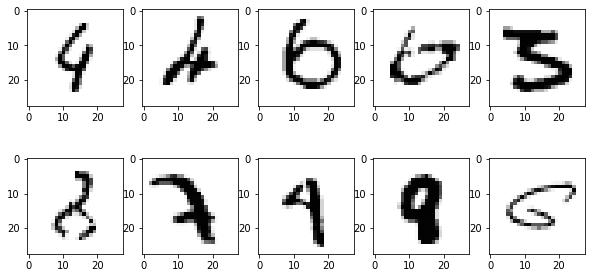

In [ ]:
# 오답 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5): # 10개만 그려봄
  plt.subplot(2, 5, i+1)
  raw_idx = diff_idx[i] # 오답 데이터의 인덱스
  plt.imshow(X_te0[raw_idx].reshape((28,28)), cmap='Greys') # 오답 데이터 시각화
plt.show() # 육안으로도 구분하기 어려운 데이터임을 확인

## 순환신경망(RNN, Recurrent Neural Network)

- 시퀀스(sequence) 데이터 사용 = 시계열(time series) 데이터
- 시간의 흐름에 따라 데이터 점차 수집

- 한 번 출력된 결과는 다시 사용되지 않는 피드포워드(feedforward) 신경망과 다르게 RNN은 출력된 결과가 다음 시점에서 사용됨
--> 은닉층을 거친 결괏값 재사용 (-> 그래디언트 소실 문제 (vanishing gradient problem)이나 그래디언트 폭주 문제 (exploding gradient problem) 발생 가능)

---------
- 일대일형태(one-to-one): 입력값과 출력값이 하나
- 다대일형태(many-to-one): 입력값은 여러개, 출력값은 하나
- 일대다형태(one-to-many): 입력값 하나, 출력값 여러개
- 다대다형태(many-to-many): 입력값과 출력값 모두 여러개
- 다대다형태(many-to-many): 입력값과 출력값 모두 여러개이지만 입력값과 출력값의 시점 차이 존재

### LSTM(Long Short Term Memory)

- 그래디언트 소실이나 폭주 문제 해결하기 위해 만든 방법
- 결괏값이 다음 시점으로 넘어갈 때 결괏값을 넘길지 말지 결정하는 단계 추가

---
(1) 입력게이트(input gate): 셀 상태 업데이트하는 역할 담당

(2) 삭제게이트(forget gate): 통과할 정보와 억제할 정도 결정

(3) 출력 게이트(output gate): 은닉 유닛의 출력값 생성

(4) 셀 상태(cell state)

(5): 은닉 유닛


### GRU (Gated Recurrent Unit)

- LSTM보다 계산 간편
- LSTM보다 학습 능력은 다소 낮음
- LSTM과 다르게 이전 시점에서 받는 벡터가 h(t) 하나
- 하나의 벡터 z(t)가 삭제 게이트와 입력 게이트 모두 제어 (1: 삭제게이트 열리고 입력 게이트 닫힘. 0: 삭제 게이트 닫히고 입력 게이트 열림)
- 출력 게이트가 없음 (전체 상태 벡터가 매 시점 출력됨)


In [ ]:
# 순환 신경망 실습

# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_test) = tf.keras.datasets.imdb.load_data(num_words=2000) # imdb 데이터 이용해 영화 리뷰 감성 분석, 모든 단어 사용하는 것 아닌 자주 사용되는 2000개만 사용하겠다는 뜻

# 결괏값은 0 또는 1 (0: 부정적 리뷰, 1: 긍정적 리뷰)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# 오리지널 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape) # 모두 25000개 데이터로 구성되어 있음을 확인

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# 트레이닝/밸리데이션 셋 분리
# validation set은 training set의 일부
X_train = X_tn0[0:20000]
print(X_train.shape)
y_train = y_tn0[0:20000]
print(y_train.shape)
X_valid = X_tn0[20000:250000]
print(X_valid.shape)
y_valid = y_tn0[20000:25000]
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


In [ ]:
# 피처 데이터 형태 확인
print(X_train[0])
# 숫자로 이루어진 리스트. 오리지널 데이터에서 이미 단어를 숫자로 매핑해 놓아 영어 단어가 해당하는 숫자로 변환된 것임을 알 수 있음

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
# 개별 피처 크기 확인
print(len(X_train[0]))
print(len(X_train[1]))

# 두 개의 피처값이 다른 것은 문장 길이가 다르다는 것의 의미함. 나중에 같은 크기로 조정 필요

218
189


In [ ]:
# 타깃 클래스 확인
print(set(y_test)) # 이진 분류인 것 확인 가능
print(len(set(y_test))) # 당연하게 클래스도 2개로 구분함을 알 수 있음

{0, 1}
2


In [ ]:
# 피처 데이터 변형 (피처 데이터값 길이 일치시키기)
from tensorflow.keras.preprocessing import sequence # 길이 맞출 때는 sequence 이용

# 트레이닝 피처 데이터
X_train = sequence.pad_sequences(X_train, maxlen=100) # pad_sequences 함수 이용해 길이를 100으로 맞춤. 100 넘으면 삭제, 100 되지 않으면 0으로 채움
print(X_train.shape)

# 밸리데이션 피처 데이터
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
print(X_valid.shape)

# 테스트 피처 데이터
X_test = sequence.pad_sequences(X_te0, maxlen=100)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


In [ ]:
# LSTM 모형 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

# 모형 생성
model = Sequential()

# 임베딩 층 추가 (input_dim은 총 단어의 개수, output_dim은 각 데이터값의 길이)
model.add(Embedding(input_dim=2000, output_dim=100))
# 합성곱 층 추가 (1차원 데이터)
model.add(Conv1D(50, kernel_size=3, padding='valid', activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, None, 50)          15050     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 50)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                      

In [ ]:
# 모형 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습
hist = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
200/200 [==============================] - 37s 168ms/step - loss: 0.4785 - accuracy: 0.7565 - val_loss: 0.3883 - val_accuracy: 0.8276
Epoch 2/10
200/200 [==============================] - 35s 177ms/step - loss: 0.3426 - accuracy: 0.8540 - val_loss: 0.3735 - val_accuracy: 0.8294
Epoch 3/10
200/200 [==============================] - 37s 185ms/step - loss: 0.3022 - accuracy: 0.8747 - val_loss: 0.3724 - val_accuracy: 0.8316
Epoch 4/10
200/200 [==============================] - 31s 155ms/step - loss: 0.2625 - accuracy: 0.8939 - val_loss: 0.3850 - val_accuracy: 0.8304
Epoch 5/10
200/200 [==============================] - 30s 150ms/step - loss: 0.2107 - accuracy: 0.9229 - val_loss: 0.4432 - val_accuracy: 0.8228
Epoch 6/10
200/200 [==============================] - 39s 197ms/step - loss: 0.1512 - accuracy: 0.9442 - val_loss: 0.4137 - val_accuracy: 0.8254
Epoch 7/10
200/200 [==============================] - 40s 198ms/step - loss: 0.0895 - accuracy: 0.9721 - val_loss: 0.6316 - val_ac

In [ ]:
# 모형 평가
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])
print(model.evaluate(X_test, y_test)[1])

625/625 [==============================] - 15s 22ms/step - loss: 0.0118 - accuracy: 0.9977
0.9976500272750854
157/157 [==============================] - 4s 20ms/step - loss: 0.7320 - accuracy: 0.8224
0.8223999738693237
782/782 [==============================] - 17s 21ms/step - loss: 0.7136 - accuracy: 0.8285
0.8284800052642822


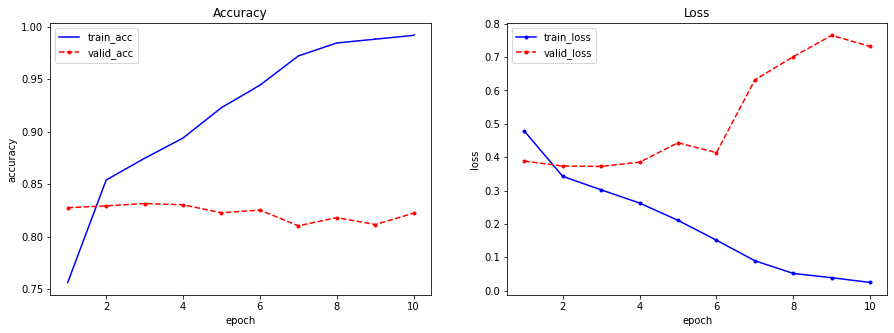

In [ ]:
# 정확도 & 손실 그래프
import numpy as np
epoch = np.arange(1,11) # x축이 될 epoch 설정 (10단계에 걸쳐 학습. 따라서 1-10 필요)
acc_train = hist.history['accuracy'] # 트레이닝 데이터의 정확도
acc_valid = hist.history['val_accuracy'] # 밸리데이션 데이터의 정확도
loss_train = hist.history['loss'] # 트레이닝 데이터의 손실
loss_valid = hist.history['val_loss'] # 밸리데이션 데이터의 손실



import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121) # 정확도 그래프와 손실 그래프 한꺼번에 그리기 위해 서브 플롯 설정
plt.plot(epoch, acc_train, 'b', marker=',', label='train_acc') # 가로축을 학습 단계인 epoch로 설정, 세로축을 트레이닝 데이터 정확도로 지정
plt.plot(epoch, acc_valid, 'r--', marker='.', label='valid_acc') # 같은 방법으로 밸리데이션 정확도 플롯 추가
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(122) # 같은 방법으로 손실 그래프 서브 플롯 그려줌
plt.plot(epoch, loss_train, 'b', marker='.', label='train_loss')
plt.plot(epoch, loss_valid, 'r--', marker='.', label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

## 오토 인코더(Auto-Encoder)

- 비지도 학습

- 입력 데이터를 코드(code)라고 부르는 은닉층으로 인코딩하는 인코더(encoder) 부분과 인코딩된 code를 다시 디코딩하는 디코더(decoder)로 구성
- 인코딩: 원래 데이터 차원 축소
- 디코딩: 차원 축소된 데이터 다시 원래 데이터로 복원하는 것
- 입력층보다 적은 수의 노드로 구성된 은닉층(code)을 중간에 넣어 차원 줄임
- 입력 데이터 벡터 x와 출력층으로 복원된 데이터 벡터 x' 간의 복원 에러를 줄이는 방향으로 학습
- 오리지널 데이터의 특징 잘 살린 이미지 만들어냄


In [ ]:
# 랜덤 시드 생성
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# 데이터 불러오기
from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data() # 손글씨 데이터

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 오리지널 데이터 차원 확인 
print(X_tn0.shape) # 트레이닝 데이터는 가로 28, 세로 28, 이미지 60,000장으로 구성
print(y_tn0.shape)
print(X_te0.shape) # 테스트 데이터는 가로 28, 세로 28, 이미지 10,000장으로 구성
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


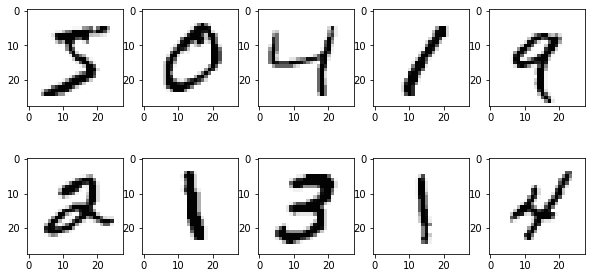

In [ ]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5): # 10장 시각화
  plt.subplot(2, 5, i+1)
  plt.imshow(X_tn0[i].reshape((28,28)), cmap='Greys')
plt.show()

In [ ]:
# 피처 데이터 스케일 조정

# 오토 인코더의 합성곱 층 추가하기 위해서는 이미지 데이터 차원이 4개로 표현되어야 함
X_tn_re = X_tn0.reshape(60000, 28, 28, 1) # (이미지 개수, 가로, 세로, 채널 수)
X_tn = X_tn_re/255 # 픽셀값을 0-1 값을 가지기 위해 255로 나눠줌
print(X_tn.shape)

X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# 노이즈 피처 데이터
import numpy as np

# 오리지널 트레이닝 데이터에 랜덤값 더해줌. 균일 분포에서 추출한 랜덤값
# 랜덤값은 -1에서 1 사잇값 가짐. 배열 사이즈를 트레이닝 데이터의 차원과 일치시켜 생성함
X_tn_noise = X_tn + np.random.uniform(-1, 1, size=X_tn.shape)
X_te_noise = X_te + np.random.uniform(-1, 1, size=X_te.shape)

In [ ]:
# 노이즈 데이터 스케일링

# 노이즈 데이터 생성하는 과정에서 픽셀값이 0 이하 혹은 1 이상이 되었을 가능성 있어서 스케일 조정
X_tn_ns = np.clip(X_tn_noise, a_min=0, a_max=1)
X_te_ns = np.clip(X_te_noise, a_min=0, a_max=1)

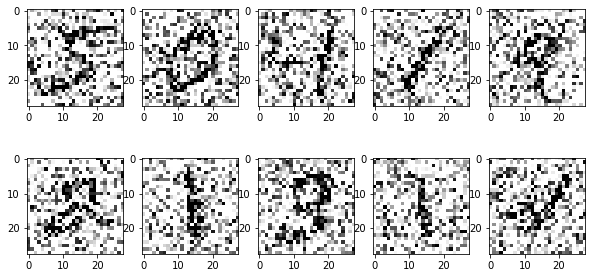

In [ ]:
# 노이즈 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_tn_ns[i].reshape((28,28)), cmap='Greys')
plt.show() # 노이즈 추가되어 글씨가 잘 안 보임

In [ ]:
# 인코더 모형 생성
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Activation

# 인코더
input_layer1 = Input(shape=(28,28,1)) # 인코더 모형 입력층 설정
x1 = Conv2D(20, kernel_size=(5,5), padding='same')(input_layer1) # 합성층 추가. 아웃풋 개수 20, 커널 사이즈 (5,5), 패딩 설정.
x1 = Activation(activation='relu')(x1) # 렐루 함수 통해 합성층 연산
output_layer1 = MaxPool2D(pool_size=2, padding='same')(x1) # 풀링 적용 후 인코더 모형의 출력층 생성
encoder = Model(input_layer1, output_layer1) # 설정한 입력층과 출력층 이용해 인코더 모형 만듦
encoder.summary() # 인코더 모형 구조 확인

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 20)        520       
                                                                 
 activation_1 (Activation)   (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 인코더 아웃풋 차원 확인
print(output_layer1.shape)
print(output_layer1.shape[0])
print(output_layer1.shape[1])
print(output_layer1.shape[2])
print(output_layer1.shape[3])

# 인코더 모형으로 출력된 아웃풋의 차원 확인. 이는 디코더 모형의 인풋 사이즈로 적용

(None, 14, 14, 20)
None
14
14
20


In [ ]:
# 디코더 모형 생성

input_layer2 = Input(shape=output_layer1.shape[1:4]) # 입력층 설정. 입력층 데이터의 차원은 인코더 모형의 아웃풋 출력 차원과 동일
x2 = Conv2D(10, kernel_size=(5,5), padding='same')(input_layer2) # 합성층 추가. 출력 개수 10개, 커널 사이즈 5x5, padding=same으로 입력 이미지와 출력 이미지 같게 함
x2 = Activation(activation='relu')(x2) # 렐루 함수 이용해 합성층 결과 출력
x2 = UpSampling2D()(x2) # 줄어들었던 차원 높이기
x2 = Conv2D(2, kernel_size=(5,5), padding='same')(x2) # 합성곱 층 추가
output_layer2 = Activation(activation='relu')(x2) # 활성화 함수를 렐루 함수로 설정해 아웃풋 출력. 아웃풋은 인풋 이미지의 채널 수와 같아야 하므로 1이어야
decoder = Model(input_layer2, output_layer2) # 인풋 층과 아웃풋 층을 이용해 디코더 모형 생성

decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14, 14, 20)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 10)        5010      
                                                                 
 activation_2 (Activation)   (None, 14, 14, 10)        0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 10)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 2)         502       
                                                                 
 activation_3 (Activation)   (None, 28, 28, 2)         0         
                                                           

In [ ]:
# 오토 인코더 모형 생성
input_auto = Input(shape=(28,28,1)) # 입력층의 크기와 동일한 오토 인코더 모형의 입력층
output_auto = decoder(encoder(input_auto)) # 최종 아웃풋 층
auto_encoder = Model(input_auto, output_auto) # 최초의 입력값 인코더에 먼저 넣고 그 결과로 나온 아웃풋 다시 디코더에 넣기
auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model_1 (Functional)        (None, 14, 14, 20)        520       
                                                                 
 model_2 (Functional)        (None, 28, 28, 2)         5512      
                                                                 
Total params: 6,032
Trainable params: 6,032
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모형 컴파일
auto_encoder.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
# 학습
hist = auto_encoder.fit(X_tn_ns, X_tn, epochs=1, batch_size=100)

# 적합시킬 데이터 중 피처 데이터는 노이즈가 추가된 피처 데이터인 X_tn_ns 
# 타깃 데이터는 노이즈가 없는 오리지널 트레이닝 데이터 X_tn

600/600 [==============================] - 186s 308ms/step - loss: 0.0281 - mean_squared_error: 0.0281


In [ ]:
# 예측값
X_pred = auto_encoder.predict(X_tn_ns)

In [ ]:
print(X_pred.shape)

(60000, 28, 28, 2)


ValueError: ignored

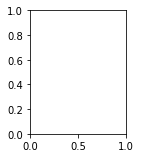

In [ ]:
# 오토 인코더 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_pred[i].reshape((28,28)), cmap='Greys') # 플롯 그리는 대상만 오토 인코더 모형으로 구한 예측값인 X_pred 넣으면 됨

plt.show() # 노이즈 제거하기 전보다 훨씬 보기 좋아졌음을 확인 가능

## 자연어 처리 (Natural Language Processing, NLP)

- 인간이 사용하는 언어 처리
- 문법적으로 가장 작은 단위 = 토큰(token)
- 전체 글을 토큰으로 나누는 것을 토큰화(tokenization)한다고 함
- 어떤 토큰이 자주 사용되었는지를 워드 카운트(word count)라고 함

In [ ]:
# 문장 토큰화한 후 워드 카운트
from tensorflow.keras.preprocessing.text import Tokenizer
paper = ['많은 것을 바꾸고 싶다면 많은 것을 받아들여라.']
tknz = Tokenizer()
tknz.fit_on_texts(paper)
print(tknz.word_index)
print(tknz.word_counts)

{'많은': 1, '것을': 2, '바꾸고': 3, '싶다면': 4, '받아들여라': 5}
OrderedDict([('많은', 2), ('것을', 2), ('바꾸고', 1), ('싶다면', 1), ('받아들여라', 1)])


In [ ]:
# 단어를 벡터로 변환 (원-핫 인코딩)
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩에 필요한 함수
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰화를 위해 필요한 함수
paper = ['많은 것을 바꾸고 싶다면 많은 것을 받아들여라.'] # 대상 문장
tknz = Tokenizer()
tknz.fit_on_texts(paper)

idx_paper = tknz.texts_to_sequences(paper)
print(idx_paper) # 인덱스 사용해 문장 표현

n = len(tknz.word_index)+1 # 인덱스 최댓값+1 값 구함. 클래스 구분 개수로 적용 (인덱스 1부터 시작하기 때문에)
print(n)

idx_onehot = to_categorical(idx_paper, num_classes=n) # 각 토큰을 원-핫 인코딩으로 표현
print(idx_onehot)

[[1, 2, 3, 4, 1, 2, 5]]
6
[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1.]]]


### 단어 임베딩
- 원-핫 인코딩의 한계: 글이 길어질수록 벡터의 길이도 길어짐
- 해결 위해 단어 임베딩(Embedding)이라는 방법 사용: 단어 벡터의 길이를 사용자가 직접 지정. 인덱스 길이에 상관없이 사용자가 지정한 벡터의 길이로 모든 단어 표현

In [ ]:
# 원핫 인코딩으로는 벡터의 길이가 6. 임베딩을 통해선 벡터 길이 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential() # Sequential로 모형 만듦
model.add(Embedding(input_dim=n, output_dim=3)) # Embedding을 사용해 층 추가 (input_dim은 전체 index 개수+!. 따라서 6. output_dim은 임베딩 후 벡터 길이. 3)
model.compile(optimizer='rmsprop', loss='mse') # 컴파일
embedding = model.predict(idx_paper) # 길이가 3인 벡터로 총 7개의 토큰이 벡터화된 것 확인 가능
print(embedding)

[[[ 0.02050798 -0.01431879  0.00552772]
  [ 0.01914648 -0.00789309 -0.02920379]
  [-0.03792461 -0.01838139 -0.04564285]
  [-0.02916305  0.02944458  0.04278321]
  [ 0.02050798 -0.01431879  0.00552772]
  [ 0.01914648 -0.00789309 -0.02920379]
  [ 0.00744311  0.00574124 -0.03526013]]]


### seq2seq 모형

- 입력값으로 시퀀스를 받고 출력값도 시퀀스를 출력하는 모형

<두 가지 경우>

1. 인풋 시퀀스와 아웃풋 시퀀스가 같은 경우: 인풋 시퀀스의 길이 정보 필수

2. 인풋 시퀀스와 아웃풋 시퀀스의 길이가 다른 경우: 타깃을 예측하기 위해 인풋 시퀀스 전체 요구

- 개념적으로는 RNN과 오토 인코더 합친 형태, 구조적으로는 두 개의 RNN 모형 합친 형태 (특히 GRU, LSTM)

- 인코더는 입력 시퀀스를 읽는 역할을 함. 인코더에는 여러 개의 LSTM 모형 존재하고 큰 차원의 벡터 입력받을 수 있음. 인코더는 입력 시퀀스 처리하고 은닉 상태(state) return 함 (아웃풋은 버리고 오직 상태만 전달).  = context 역할. 디코더 단계로 전달
- 인코더는 인코딩 과정에서 입력 데이터를 하나의 벡터로 압축 (컨텍스트 벡터(context vector))

- 디코더는 타깃 시퀀스의 한 시점 이전 문자가 주어질 때, 타깃 시퀀스의 바로 다음 문자 예측하도록 학습. 교사 강요(teacher forcing)함. 인코더의 출력 벡터인 컨텍스트 벡터를 초기 벡터로 사용함

### 어텐션(Attention)

- 주위에 신경을 기울인다는 뜻
- 출력 단어 예측하는 매 시점 인코더에서 전체 입력 문장 참고하는 방식
- 모든 디코딩 과정마다 인코더 내부의 모든 은닉층을 참고함 (출력 단어와 연관이 있는 부분 좀 더 attention해서)

In [ ]:
# seq2seq 모현 학습. 영어를 프랑스어로 자동 번역하는 모형. 문자 단위 모형으로 설정

# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모형 변수 설정
n_batch = 64
epochs = 100
latent_dim = 256 # LSTM을 거쳐 출력되는 아웃풋의 크기
n_max_sample = 10000
data_path = '/content/drive/MyDrive/data/fra.txt'

In [ ]:
# 전체 데이터 불러오기
with open(data_path, 'r', encoding='utf-8') as f:
  lines = f.read().split('\n')

In [ ]:
# 데이터 확인
lines[:10]

['Go.\tVa !\tCC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)',
 'Hi.\tSalut !\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)',
 'Hi.\tSalut.\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #4320462 (gillux)',
 'Run!\tCours\u202f!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906331 (sacredceltic)',
 'Run!\tCourez\u202f!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906332 (sacredceltic)',
 'Who?\tQui ?\tCC-BY 2.0 (France) Attribution: tatoeba.org #2083030 (CK) & #4366796 (gillux)',
 'Wow!\tÇa alors\u202f!\tCC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #374631 (zmoo)',
 'Fire!\tAu feu !\tCC-BY 2.0 (France) Attribution: tatoeba.org #1829639 (Spamster) & #4627939 (sacredceltic)',
 "Help!\tÀ l'aide\u202f!\tCC-BY 2.0 (France) Attribution: tatoeba.org #435084 (lukaszpp) & #128430 (sysko)",
 'Jump.\tSaute.\tCC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishi

In [ ]:
# 인풋, 타깃 텍스트 데이터 정리
x_txts = [] # 영어 문장 모음 (입력 텍스트)
y_txts = [] # 프랑스어 문장 모음 (타깃 텍스트)
x_chars_uni = set() # 영어 문장에 쓰이는 토큰. 영어 알파벳
y_chars_uni = set() # 프랑스어 문장에 쓰이는 토큰. 프랑스어 알파벳
n_sample = min(n_max_sample, len(lines)-1) 

for line in lines[:n_sample]:
  x_txt, y_txt, _ = line.split('\t')
  y_txt = '\t' + y_txt + '\n' # 문장 시작에 <sos> 에 해당하는 \t 문장 끝에는 <eos>에 해당하는 \n 붙임
  x_txts.append(x_txt)
  y_txts.append(y_txt)

  for char in x_txt: # 해당 영어 문장에 속하는 문자에 대해 해당 문자가 영어 토큰 모음에 속하지 않는다면 추가
    if char not in x_chars_uni:
      x_chars_uni.add(char)
  for char in y_txt: # 해당 프랑스어 문장에 속하는 문자에 대해 해당 문자가 프랑스어 토큰 모음에 속하지 않는다면 추가
    if char not in y_chars_uni:
      y_chars_uni.add(char)

In [ ]:
# 인풋 데이터, 타깃 데이터 및 토큰 확인
x_txts[:5]
y_txts[:3]
x_chars_uni
y_chars_uni

{'\t',
 '\n',
 ' ',
 '!',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '5',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 'y',
 'z',
 '\xa0',
 '«',
 '»',
 'À',
 'Ç',
 'É',
 'Ê',
 'à',
 'â',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'î',
 'ï',
 'ô',
 'ù',
 'û',
 'œ',
 '\u2009',
 '’',
 '\u202f'}

In [ ]:
# 토큰 단위 정리 (한 문장에서 사용되는 최대 토큰 수 계산)

x_chars_uni = sorted(list(x_chars_uni)) # 리스트 형태로 바꾸고 정렬
y_chars_uni = sorted(list(y_chars_uni)) # 리스트 형태로 바꾸고 정렬
n_encoder_tokens = len(x_chars_uni) # 영어에 쓰이는 토큰의 개수
n_decoder_tokens = len(y_chars_uni) # 프랑스어에 쓰이는 토큰의 개수

max_encoder_seq_len = 0 # 가장 긴 문장의 길이
for txt in x_txts: # 영어 문장 데이터 셋에서 각 문장에 대해 해당 문장의 길이를 구함
  txt_len = len(txt)
  max_encoder_seq_len = max(txt_len, max_encoder_seq_len) # 더 큰 값으로 저장

max_decoder_seq_len = 0
for txt in y_txts:
  txt_len = len(txt)
  max_decoder_seq_len = max(txt_len, max_decoder_seq_len)

In [ ]:
# 단어 토큰별 인덱스
x_token_idx = {}
for idx, char in enumerate(x_chars_uni):
  x_token_idx[char] = idx

In [ ]:
y_token_idx = {}
for idx, char in enumerate(y_chars_uni):
  y_token_idx[char] = idx

In [ ]:
# 데이터 영 행렬 만들기
# 각 차원의 의미: (총 문장 개수, 가장 긴 문장 글자(토큰) 수, 토큰 개수)
encoder_x_data = np.zeros((len(x_txts), max_encoder_seq_len, n_encoder_tokens), dtype='float32') # 인풋 데이터 영 행렬

decoder_x_data = np.zeros((len(x_txts), max_decoder_seq_len, n_decoder_tokens), dtype='float32') # 프랑스어 데이터 영 행렬. 디코더의 인풋 데이터

decoder_y_data = np.zeros((len(x_txts), max_decoder_seq_len, n_decoder_tokens), dtype='float32') # 디코더의 타깃 데이터

In [ ]:
# 인풋 데이터 행렬
for i, x_txt in enumerate(x_txts): # 영어 데이터의 각 문장과 인덱스 체크 (i번째 문장)
  for t, char in enumerate(x_txt): # 해당 문장의 토큰(글자)과 해당 인덱스 체크
    encoder_x_data[i, t, x_token_idx[char]] = 1. # 해당 문장에 대해 인코더에 넣을 인풋 데잍 영 행렬의 (i, t, x_token_idx)에 해당하는 원소를 기존 0에서 1로 변환
  encoder_x_data[i, t+1:, x_token_idx[' ']] = 1. # 해당 문장에 대한 반복문이 종료되면 문장이 종료되어 공백에 해당하는 행렬 위치에 1 넣음

In [ ]:
# 타깃 데이터 행렬

for i, y_txt in enumerate(y_txts):
  for t, char in enumerate(y_txt):
    decoder_x_data[i, t, y_token_idx[char]] = 1.
    if t > 0:
      decoder_y_data[i, t-1, y_token_idx[char]] = 1.
  decoder_x_data[i, t+1:, y_token_idx[' ']] = 1.
  decoder_y_data[i, t:, y_token_idx[' ']] = 1.

In [ ]:
# 인코더 모형 생성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed

encoder_inputs = Input(shape=(None, n_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

In [ ]:
# 디코더 모형 생성
decoder_inputs = Input(shape=(None, n_decoder_tokens))
decoder = LSTM(latent_dim, 
                return_sequences=True, 
                return_state=True)
decoder_outs, _, _ = decoder(decoder_inputs,
                             initial_state=encoder_states)
decoder_dense = TimeDistributed(Dense(n_decoder_tokens, 
                                      activation='softmax'))
decoder_outputs = decoder_dense(decoder_outs)

In [ ]:
# 인코더-디코더
model = Model([encoder_inputs, decoder_inputs], 
              decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 71)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None, 93)]   0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 256),        335872      ['input_3[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
# 모형 컴파일
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 학습
model.fit([encoder_x_data, decoder_x_data], decoder_y_data,
          batch_size=n_batch,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/100
125/125 [==============================] - 62s 462ms/step - loss: 1.1796 - accuracy: 0.7261 - val_loss: 1.1070 - val_accuracy: 0.7016
Epoch 2/100
125/125 [==============================] - 61s 491ms/step - loss: 0.8412 - accuracy: 0.7727 - val_loss: 0.8529 - val_accuracy: 0.7604
Epoch 3/100
125/125 [==============================] - 67s 533ms/step - loss: 0.6763 - accuracy: 0.8090 - val_loss: 0.7101 - val_accuracy: 0.7950
Epoch 4/100
125/125 [==============================] - 56s 447ms/step - loss: 0.5884 - accuracy: 0.8291 - val_loss: 0.6415 - val_accuracy: 0.8134
Epoch 5/100
125/125 [==============================] - 61s 485ms/step - loss: 0.5386 - accuracy: 0.8428 - val_loss: 0.6060 - val_accuracy: 0.8218
Epoch 6/100
125/125 [==============================] - 60s 481ms/step - loss: 0.5026 - accuracy: 0.8526 - val_loss: 0.5840 - val_accuracy: 0.8274
Epoch 7/100
125/125 [==============================] - 63s 501ms/step - loss: 0.4739 - accuracy: 0.8605 - val_loss: 0.5510 -

In [ ]:
# 추론 모형 생성
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,)) # 디코더 인풋 은닉 벡터
decoder_state_input_c = Input(shape=(latent_dim,)) # 디코더 인풋 상태 벡터
decoder_states_inputs = [decoder_state_input_h, # 두 디코더 인풋 상태 벡터 합침
                         decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder(
    decoder_inputs, initial_state=decoder_states_inputs) # 디코더 모형에 인풋 데이터(decoder_inputs) 넣고 초기 상태(decoder_state_inputs) 넣은 후 실행
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [ ]:
# 토큰 리버스 인덱스 - 결과 벡터 디코딩 위함
reverse_x_char_idx = {}
for char, idx in x_token_idx.items():
    reverse_x_char_idx[idx] = char
    
reverse_y_char_idx ={}
for char, idx in y_token_idx.items():
    reverse_y_char_idx[idx] = char

In [ ]:
# 결괏값 디코딩 (seq2seq 모형의 결괏값 다시 문자 형태로 바꾸는 함수)
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq) # 학습된 인코더 모형에 인풋 데이터 넣고 결괏값인 상태 벡터 state_value라고 설정
    y_seq = np.zeros((1, 1, n_decoder_tokens)) # 디코더 모형에 넣을 인풋 데이터 담을 영 행렬 설정 (1, 1, 디코더 토큰 수)
    y_seq[0, 0, y_token_idx['\t']] = 1. # 첫 인풋 데이터인 <sos> 에 해당하는 문자 탭 문자로 설정해 y_seq에 탭 문자에 해당하는 위치에 존재하는 0값 1로 바꿈

    stop_condition = False # while 문 종료 조건
    decoded_sentence = '' # 학습된 모형이 생성하는 최종 문자 담을 곳
    while not stop_condition: # 문장 생성 종료될 때까지 반복문 실행
        output_tokens, h, c = decoder_model.predict(
            [y_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) # 디코더 모형의 결괏값에 대해 가장 큰 값을 에측값으로 샘플링
        sampled_char = reverse_y_char_idx[sampled_token_index] # 해당 인덱스에 해당하는 문자값 구하기
        decoded_sentence += sampled_char # 결과 문장에 추가

        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_len):
            stop_condition = True # 추출된 문자가 \n이거나 최대 문장 길이 초과한다면 반복문 종료

        y_seq = np.zeros((1, 1, n_decoder_tokens)) # 반복문 종료되지 않았다면 다시 타깃 문장 벡터를 영 행렬로 설정
        y_seq[0, 0, sampled_token_index] = 1. # 샘플 추출된 문자에 대해 1값 추가

        states_value = [h, c] # 상태 벡터 업데이트

    return decoded_sentence

In [ ]:
# 결과 확인
for seq_idx in range(100): # 100개 문장에 대해 실행
    x_seq = encoder_x_data[seq_idx: seq_idx + 1] # 인코더 모형의 인풋 데이터 설정
    decoded_sentence = decode_sequence(x_seq) # 디코딩하는 함수
    print('-')
    print('Input sentence:', x_txts[seq_idx])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: Go.
Decoded sentence: Caluez !

-
Input sentence: Hi.
Decoded sentence: Salut.

-
Input sentence: Hi.
Decoded sentence: Salut.

-
Input sentence: Run!
Decoded sentence: Courez !

-
Input sentence: Run!
Decoded sentence: Courez !

-
Input sentence: Who?
Decoded sentence: Qui ?

-
Input sentence: Wow!
Decoded sentence: Ça alors !

-
Input sentence: Fire!
Decoded sentence: Au feu !

-
Input sentence: Help!
Decoded sentence: À l'aide !

-
Input sentence: Jump.
Decoded sentence: Saute.

-
Input sentence: Stop!
Decoded sentence: Arrête-toi !

-
Input sentence: Stop!
Decoded sentence: Arrête-toi !

-
Input sentence: Stop!
Decoded sentence: Arrête-toi !

-
Input sentence: Wait!
Decoded sentence: Attendez !

-
Input sentence: Wait!
Decoded sentence: Attendez !

-
Input sentence: Go on.
Decoded sentence: Continuez.

-
Input sentence: Go on.
Decoded sentence: Continuez.

-
Input sentence: Go on.
Decoded sentence: Continuez.

-
Input sentence: Hello!
Decoded sentence: Salut !

-


## 적대적 생성 신경망(GAN, Generative Adversarial Network)

- 생성 모형 (generator)과 판별 모형(discriminator)이라는 두 신경망이 서로 간의 경쟁 통해 학습하는 신경망
- 판별 모형의 목적: 주어진 데이터가 데이터 셋의 오리지널 데이터로부터 추출되었는지 아니면 생성기가 만들어 낸 가짜 데이터인지를 구분
- 생성 모형의 목적: 판별 모형이 구분할 수 없도록 진짜 같은 가짜 데이터 생성

In [ ]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# 데이터 불러오기
from tensorflow.keras.datasets import mnist
(X_raw, _), (_, _) = mnist.load_data() # 트레이닝 피처 데이터만 사용할 것임

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 학습을 위한 변수 설정
n_img = X_raw.shape[0] # 이미지 데이터 개수
epoch = 3000 # GAN은 비교적 높은 에포크 요구 (3000개는 약 2시간 걸림)
n_batch = 100

In [ ]:
# 데이터 전처리
import numpy as np
X_re = X_raw.reshape(n_img, 28, 28, 1) # 차원 변경.CNN Conv2D 사용 위ㅣ해
scale_c = 255/2
X = (X_re - scale_c) / scale_c
real_1 = np.ones((n_batch, 1)) # 원본 손글씨 데이터의 타깃 데이터. 원본 데이터가 실제 손글씨 데이터면 1, 가짜 데이터면 0. real_1은 실제 손글씨 데이터에 대한 타깃 데이터이므로 모두 1 가짐
fake_0 = np.zeros((n_batch, 1)) # 가짜 데이터이므로 모두 0값 가짐

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU

In [ ]:
# 생성자
input_layer1 = Input(shape=(100,))
x1 = Dense(64*7*7)(input_layer1)
x1 = BatchNormalization()(x1)
x1 = Activation(LeakyReLU(0.3))(x1)
x1 = Reshape((7,7,64))(x1)
x1 = UpSampling2D()(x1)
x1 = Conv2D(32, kernel_size=(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation(LeakyReLU(0.3))(x1)
x1 = UpSampling2D()(x1)
output_layer1 = Conv2D(1, kernel_size=(3,3), 
                       padding='same', 
                       activation='tanh')(x1)
generator = Model(input_layer1, output_layer1)
generator.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 3136)              316736    
                                                                 
 batch_normalization (BatchN  (None, 3136)             12544     
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 3136)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 64)       0         
 )                                                         

In [ ]:
# 판별자
input_layer2 = Input(shape=(28, 28, 1))
x2 = Conv2D(64, kernel_size=(5,5), padding='same')(input_layer2)
x2 = Activation(LeakyReLU(0.3))(x2)
x2 = Dropout(0.25)(x2)
x2 = Conv2D(128, kernel_size=(3,3), padding='same')(x2)
x2 = Activation(LeakyReLU(0.3))(x2)
x2 = Dropout(0.25)(x2)
x2 = Flatten()(x2)
output_layer2 = Dense(1, activation='sigmoid')(x2)
discriminator = Model(input_layer2, output_layer2)
discriminator.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
discriminator.trainable = False
discriminator.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 activation_2 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 activation_3 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 128)       0   

In [ ]:
# GAN
input_gan = Input(shape=(100,))
output_dis = discriminator(generator(input_gan))
gan = Model(input_gan, output_dis)
gan.compile(loss='binary_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])
gan.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 model_3 (Functional)        (None, 28, 28, 1)         348161    
                                                                 
 model_4 (Functional)        (None, 1)                 175873    
                                                                 
Total params: 524,034
Trainable params: 341,825
Non-trainable params: 182,209
_________________________________________________________________


In [ ]:
# 학습
import numpy as np
loss_disc_real = [0]*epoch
loss_disc_fake = [0]*epoch
loss_disc_avg = [0]*epoch
loss_gan = [0]*epoch
acc_disc_real = [0]*epoch
acc_disc_fake = [0]*epoch
acc_disc_avg = [0]*epoch
acc_gan = [0]*epoch

for i in range(0, epoch):
    # 실제 데이터 판별
    idx = np.random.randint(0, n_img, n_batch)
    imgs = X[idx]
    res_real = discriminator.train_on_batch(imgs, real_1)
    
    # 가짜 데이터 생성 및 판별
    fake = np.random.normal(0, 1, size=(n_batch, 100))
    gen_imgs = generator.predict(fake)
    res_fake = discriminator.train_on_batch(gen_imgs, fake_0)
    
    # 판별 손실 평균 & 정확도 평균
    loss_disc_avg_ith = np.add(res_real[0],res_fake[0])*0.5
    acc_disc_avg_ith = np.add(res_real[1],res_fake[1])*0.5
    
    # GAN 결과
    res_gan = gan.train_on_batch(fake, real_1)

    # 정확도 및 손실
    loss_disc_real[i] = res_real[0]
    loss_disc_fake[i] = res_fake[0]
    loss_disc_avg[i] = loss_disc_avg_ith
    loss_gan[i] = res_gan[0]
    
    acc_disc_real[i] = res_real[1]
    acc_disc_fake[i] = res_fake[1]
    acc_disc_avg[i] = acc_disc_avg_ith
    acc_gan[i] = res_gan[1]
    
    print('epoch:%d'%i,
          ' 판별손실평균:%.4f'%loss_disc_avg_ith,
          ' 판별정확도평균:%.4f'%acc_disc_avg_ith,
          ' 생성손실:%.4f'%res_gan[0], 
          ' 생성정확도:%.4f'%res_gan[1])

epoch:0  판별손실평균:0.8736  판별정확도평균:0.4650  생성손실:0.0525  생성정확도:1.0000
epoch:1  판별손실평균:0.5892  판별정확도평균:0.5000  생성손실:0.2958  생성정확도:1.0000
epoch:2  판별손실평균:0.2544  판별정확도평균:1.0000  생성손실:2.9414  생성정확도:0.0000
epoch:3  판별손실평균:1.1863  판별정확도평균:0.5000  생성손실:0.1889  생성정확도:1.0000
epoch:4  판별손실평균:0.1943  판별정확도평균:1.0000  생성손실:0.0076  생성정확도:1.0000
epoch:5  판별손실평균:0.1252  판별정확도평균:0.9950  생성손실:0.0002  생성정확도:1.0000
epoch:6  판별손실평균:0.0644  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:7  판별손실평균:0.0237  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:8  판별손실평균:0.0095  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:9  판별손실평균:0.0022  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:10  판별손실평균:0.0010  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:11  판별손실평균:0.0005  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:12  판별손실평균:0.0002  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:13  판별손실평균:0.0019  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch:14  판별손실평균:0.0004  판별정확도평균:1.0000  생성손실:0.0000  생성정확도:1.0000
epoch

In [ ]:
# 손실 그래프
import numpy as np
import matplotlib.pyplot as plt
epo = np.arange(0, epoch)
plt.figure()
plt.plot(epo, loss_disc_real, 'y:', label='disc_real')
plt.plot(epo, loss_disc_fake, 'g-:', label='disc_fake')
plt.plot(epo, loss_disc_avg, 'b--:', label='disc_avg')
plt.plot(epo, loss_gan, 'r:', label='generator')
plt.title('LOSS')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
# 정확도 그래프
plt.figure()
plt.plot(epo, acc_disc_real,'y:',label='disc_real')
plt.plot(epo, acc_disc_fake,'g-.',label='disc_fake')
plt.plot(epo, acc_disc_avg,'b--',label='disc_avg')
plt.plot(epo, acc_gan,'r',label='generator')
plt.title('ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# GAN으로 생성된 가짜 손글씨 데이터 확인 (epoch=3000)
import matplotlib.pyplot as plt
gen_imgs = 0.5 * gen_imgs + 0.5
plt.figure(figsize=(10, 5))
for i in range(3*5):
    plt.subplot(3, 5, i+1)
    plt.imshow(gen_imgs[i].reshape((28, 28)), cmap='Greys')
plt.show()